In [ ]:
datadir='/dls/i16/data/2018/cm19668-2/'

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
#from dlstools.quickfit import *
#from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')

In [ ]:
#modified function to use ABAB cycle
def im_diff_sum(scans, minfrac):
    import sys

    d(scans[0]); p(1); im_pos_sum=p.image_01*0; im_neg_sum=p.image_01*0;

    for scan in scans:
        d(scan); plot(d.sum)
        min_sum_threshold=minfrac*d.sum[0]
        cycle=0

        ncycles=len(d.sum)/4
        for i in range(ncycles):
            imlist=[]; Vdemlist=[]; bad=False
            for j in range(4):
                sys.stdout.write(str(i*4+j)+'\r')
                p(d.path[i*4+j]);  imlist+=[p.image_01];  
                #Vdemlist+=[d.Vdem[i*4+j]]
                Vdemlist+=[d.x22_anout[i*4+j]] 
                if d.sum[i*4+j]<min_sum_threshold:
                    bad=True; #print "======  bad one ========"
            #print Vdemlist, bad
            if bad==False:
                #im_pos_sum+=imlist[0]+imlist[3]
                #im_neg_sum+=imlist[1]+imlist[2]
                im_pos_sum+=imlist[0]+imlist[2]# keep changes to minumum from ABBA version
                im_neg_sum+=imlist[1]+imlist[3]          
                
                cycle+=1        
        print "=== Good cycles: %i Total: %i" % (cycle, ncycles)       
    return(im_pos_sum, im_neg_sum)


def array_shrink(array_old, ifac, jfac):
    #add array elements in ifac x jfac blocks to make smaller array
    ilen, jlen = array_old.shape
    inew, jnew = ilen/ifac, jlen/jfac
    array_new=zeros([inew, jnew])
    #print inew, jnew, array_new
    for i in range(inew):
        for j in range(jnew):
            for isum in range(ifac):
                for jsum in range(jfac):
                    array_new[i,j]=sum(array_old[i*ifac:(i+1)*ifac, j*jfac:(j+1)*jfac])
    return array_new


In [3]:
d(706821+1)

#706822  x x22_anout ic1 kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata

/dls_sw/i16/software/python/dlstools/dataloader.py:154: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(kwargs['hold'])  #or use hold value


<IPython.core.display.Javascript object>


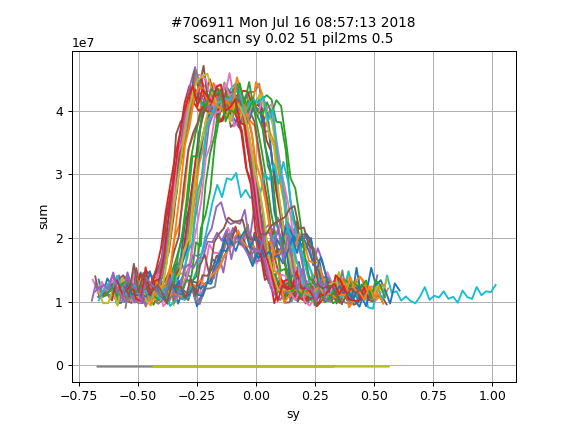

/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


=== Good: 31	Bad: 15


<IPython.core.display.Javascript object>


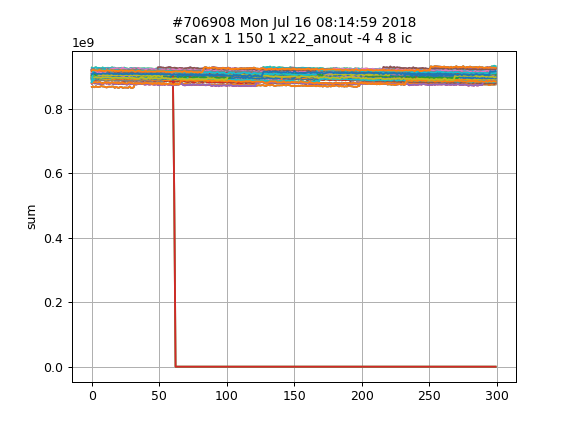

In [4]:
goodscans=[]
first=706821 #sy scan
last=706913
scans = range(first, last, 2)
for i in scans:
    d(i) 
    d.plot('sy','sum', hold=1)
    if max(d.sum)>3.5e7:
        goodscans += [i+1]
print "=== Good: %i\tBad: %i" % (len(goodscans), len(scans)-len(goodscans))

figure()
for scan in goodscans:
    d(scan)
    d.plot('sum', hold=1)
#scans=range(first+1, last, 2)
#(im_pos_sum, im_neg_sum)=im_diff_sum(scans, 0.9)

In [5]:
(im_pos_sum, im_neg_sum)=im_diff_sum(goodscans, 0.9)

=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 15 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75
=== Good cycles: 75 Total: 75


<IPython.core.display.Javascript object>


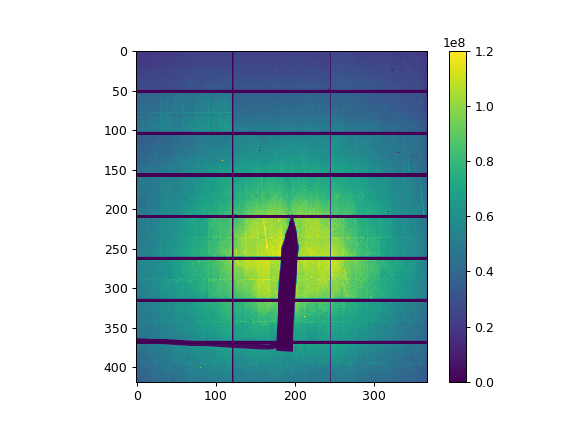

<IPython.core.display.Javascript object>


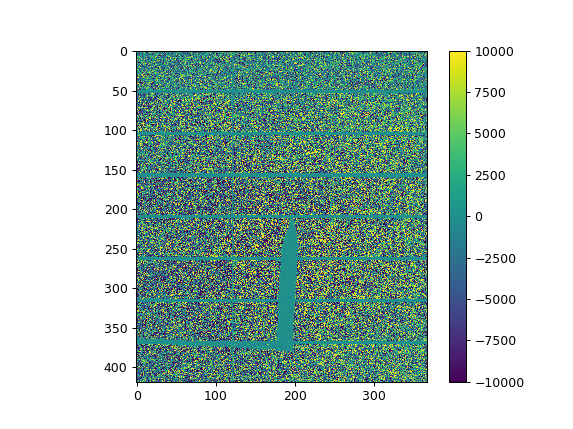

In [7]:
im_sum = im_pos_sum + im_neg_sum
im_diff = im_pos_sum - im_neg_sum
new_sum=array_shrink(im_sum,4,4)
new_diff=array_shrink(im_diff,4,4)

figure(); imshow(new_sum); clim([0,1.2e8]); colorbar()
figure(); imshow(new_diff); clim([-1e4, 1e4]); colorbar()
#savefig('/home/spc93/tmp/bromopropene_diff.pdf')